### Ким Дарья Вячеславовна, БПМ-151, вариант 13

# Лабораторная работа №8
## ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scp_integrate
from sympy import *

%matplotlib inline

#### Задача 8.1

Вычислить значение интеграла $$I = \int\limits_{1}^{1.44}P_n(x)dx,$$ где $$P_n(x) = \sum\limits_{i=0}^{n}c_ix^i,$$ с помощью квадратурных формул трапеций и Симпсона для элементарного отрезка интегрирования. Оценить величину погрешности. Применяя те же квадратурные формулы для составного отрезка интегрирования, вычислить интеграл $I$ с точностью $0.0001$. Предварительно оценить шаг интегрирования, при котором достигается заданная точность. 

| $c_0$ | $c_1$ | $c_2$ | $c_3$ | $c_4$ |
| ----- | ----- | ----- | ----- | ----- |
|  4.9  |  5.3  |  3.3  |  0.8  |  5.1  |

In [2]:
c = np.array([4.9, 5.3, 3.3, 0.8, 5.1])
epsilon = 1e-4

Зададим многочлен $P_n(x)$:

In [3]:
p_n = np.poly1d(c)
print(p_n)

     4       3       2
4.9 x + 5.3 x + 3.3 x + 0.8 x + 5.1


**1.** Вычислим значение интеграла $I$ c помощью встроенной функции sympy.integrate.quad.

In [4]:
precise_int = scp_integrate.quad(p_n, 1, 1.44)[0]
precise_int

14.318181565951999

Вычислим значение интеграла $I$ по формулам трапеций и Симпсона, считая отрезок $[1, 1.44]$ элементарным отрезком интегрирования. Оценим абсолютные погрешности результатов.

### Метод трапеции

In [5]:
# f - подынтегральная функция
# a, b - пределы интегрирования
# h - величина шага (aka точность)

def trapezoidal(f, a, b, h):
    n=int(np.ceil((b-a)/h))
    s = 0.5*(f(a) + f(b))
    for i in range(1, n):
        s += f(a + i*h)
    return s*h

In [6]:
print('Решение методом трапеции:\n {0}'.format(trapezoidal(p_n, 1, 1.44, epsilon)))
print('Решение встроенным методом (аналитическое, but who cares):\n {0}'.format(precise_int))
print('Абсолютная погрешность результата:\n {0}'.format(np.abs(trapezoidal(p_n, 1, 1.44, epsilon)-precise_int)))

Решение методом трапеции:
 14.318181615034945
Решение встроенным методом (аналитическое, but who cares):
 14.318181565951999
Абсолютная погрешность результата:
 4.9082945707823455e-08


### Формула Симпсона

In [7]:
# f - подынтегральная функция
# a, b - пределы интегрирования
# h - величина шага (aka точность)

def simpson(f, a, b, h):
    n = int(np.ceil((b-a)/h))
    s = f(a) + f(b)
    for i in range(1, n):
        s += 4*f(a + i*h - 0.5*h)
    for i in range(1, n):
        s += 2*f(a + i*h)
    return s*h/6

In [8]:
print('Решение с использованем формулы Симпсона:\n {0}'.format(simpson(p_n, 1, 1.44, epsilon)))
print('Решение встроенным методом (аналитическое, but who cares):\n {0}'.format(precise_int))
print('Абсолютная погрешность результата:\n {0}'.format(np.abs(simpson(p_n, 1, 1.44, epsilon)-precise_int)))

Решение с использованем формулы Симпсона:
 14.314849258715638
Решение встроенным методом (аналитическое, but who cares):
 14.318181565951999
Абсолютная погрешность результата:
 0.0033323072363611317


Используя выражение для остаточных членов интегрирования $$R = \frac{M_2(b-a)h^2}{12},$$ оценим шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше $0.0001$.
$$R = \frac{M_2(b-a)h^2}{12}<0.0001$$
$$h<\sqrt{\frac{12\cdot0,0001}{M_2\cdot(b-a)}}$$<br/>
Вычислим $M_2=\max\limits_{[1,1.44]}|f^{(2)}(x)|=\max\limits_{[1,1.44]}|58.8x^2+31.8x+6.6|=174.3$  

In [9]:
print(np.poly1d(p_n.deriv(m=2))) # вторая производная подынтегральной функции
np.poly1d(p_n.deriv(m=2))(1.44)

      2
58.8 x + 31.8 x + 6.6


174.31967999999998

Остаточный член формулы Симпсона:
$$\frac{M_4(b-a)\cdot h^4}{2880}<0.0001$$
$$h^4<\frac{2880*0.0001}{M_4*(b-a)}$$
$$h<\sqrt[4]{\frac{2880*0,0001}{M_4*(b-a)}}$$
$M_4=\max\limits_{[1,1.44]}|f^{(4)}(x)| = 117.6$

In [10]:
print(np.poly1d(p_n.deriv(m=4))) # 4-я производная подынтегральной функции

 
117.6


In [11]:
ht = np.sqrt(12*0.0001/174.3197*(1.44-1))
print('Шаг интегрирования согласно оценке: ', ht)
print("Решение полученное методом трапеции: ", trapezoidal(p_n, 1, 1.44, ht))
print("Аналитическое решение: ", precise_int)
print("Абсолютная погрешность результатов: ",np.fabs(trapezoidal(p_n, 1, 1.44, ht) - precise_int))

Шаг интегрирования согласно оценке:  0.00174037856738054
Решение полученное методом трапеции:  14.333959166720518
Аналитическое решение:  14.318181565951999
Абсолютная погрешность результатов:  0.015777600768519306


In [12]:
hs = np.sqrt(12*0.0001/(117.6*(1.44-1)))
print('Шаг интегрирования согласно оценке: ',format(hs))
print("Решение полученное методом трапеции: ", trapezoidal(p_n, 1, 1.44, hs))
print("Аналитическое решение: ", precise_int)
print("Абсолютная погрешность результатов: ",np.fabs(trapezoidal(p_n, 1, 1.44, hs) - precise_int))

Шаг интегрирования согласно оценке:  0.004815713303308873
Решение полученное методом трапеции:  14.470270713125457
Аналитическое решение:  14.318181565951999
Абсолютная погрешность результатов:  0.15208914717345756


### Задача 8.3
Вычислить значение интеграла $\int\limits_{a}^{b}f(x)dx$ аналитически и, используя формулу центральных прямоугольников, с шагами $$h: \frac{b-a}{2}, \frac{b-a}{3},...,\frac{b-a}{20}.$$ При указанных значениях $h$ найти абсолютную погрешность и оценки теоретической абсолютной погрешности. На одном чертеже построить графики найденных погрешностей. <br/>
$$f(x) = (x+2x^4)\cdot\sin{x^2}$$
$$a=0,\; b=1.7$$
$$M_2 = 9.045$$

In [13]:
f = lambda x: (x+2*x**4)*np.sin(x**2)
a = 0
b = 1.7
M_2 = 9.045

In [14]:
f_prec_int = scp_integrate.quad(f, a, b)[0]
print('Точное значение интеграла: ', f_prec_int)

Точное значение интеграла:  5.048844370458184


In [15]:
def illustrate(x_range, fun):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.plot(x_range, fun(x_range), c='tab:pink')
    plt.grid(True)

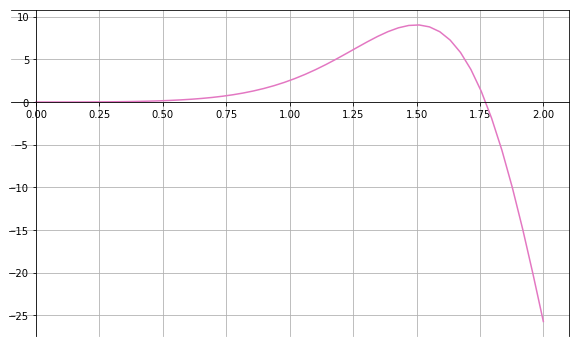

In [16]:
illustrate(np.linspace(0.0, 2.0), f)

In [17]:
# f - подынтегральная функция
# a, b - пределы интегрирования
# n - количество шагов 

def rectangles(f, a, b, n):
    h = float((b-a)/n)
    s = 0
    for i in range(1, n+1):
        s += f(a + i*h-0.5*h)
    return s*h

In [18]:
step_by_step = [rectangles(f, a, b, i) for i in range(2, 21)]
print(step_by_step)

[5.642746952291317, 5.588334442761715, 5.393798886739161, 5.279337988099312, 5.212078038104731, 5.17005096098478, 5.1422414393448435, 5.122950281247284, 5.109044806696775, 5.098701226878094, 5.090803595159964, 5.084639549509902, 5.079737653808183, 5.075776113230772, 5.072529321519993, 5.069835377365731, 5.067575690731222, 5.0656618067047505, 5.064026673139449]


In [19]:
indices = np.arange(0, 19)
abs_err = [np.fabs(rectangles(f, a, b, i) - f_prec_int) for i in range(2, 21)]
thabs_err = [(M_2*(b-a)*((b-a)/i)**2/24) for i in range(2, 21)]

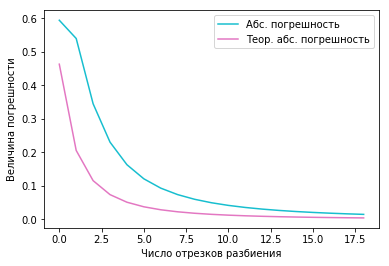

In [20]:
cyan_line, = plt.plot(indices, abs_err, label="Абс. погрешность", color='tab:cyan')
pink_line, = plt.plot(indices, thabs_err, label="Теор. абс. погрешность", color='tab:pink')
ax=plt.gca()
ax.legend()
plt.xlabel('Число отрезков разбиения')
plt.ylabel('Величина погрешности')
plt.show()